In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import os

In [13]:
def get_dataframe(filename, path='results'):
    with open(os.path.join(path,filename)) as file:
        data = file.read()
    filename_info = filename.split('.')[0].split('_')
    df = pd.read_json(data[:-1].replace("'", '"').replace('True', '"True"').replace('False', '"False"'), lines=True)
    df = df.replace({'solved': {'True': True, 'False': False}}).astype({'time':np.float32, 'solved':'bool'})
    df['problem']=filename_info[-2]
    return df

def get_dataframes(path='results'):
    filenames = os.listdir(path)
    df = pd.concat([get_dataframe(filename, path) for filename in filenames], axis=0)
    return df

In [14]:
df = get_dataframes(path='results')
df.head()

,filename,time,solver,solved,problem
0,58,300.088654,backtracking,False,sudoku
1,47,300.060516,backtracking,False,sudoku
2,42,7.611250,backtracking,True,sudoku
3,37,0.015400,backtracking,True,sudoku
4,50,300.103607,backtracking,False,sudoku


In [5]:
df.dtypes

filename     object
time        float32
solver       object
solved         bool
problem      object
dtype: object

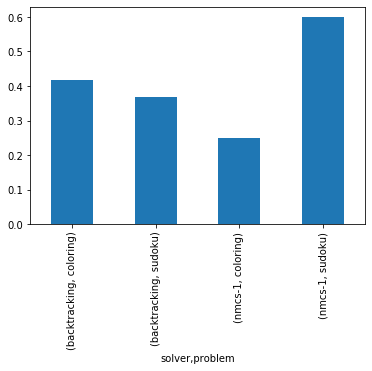

In [19]:
df.groupby(['solver', 'problem'])['solved'].mean().plot.bar()

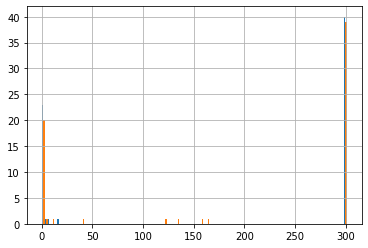

In [20]:
df.groupby('solver')['time'].apply(list).hist(bins = 100)